# French road analysis

Hello world, our goal here is to plot french trafic roads density per year and compare the evolution of it.

## Import packages

In [89]:
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load datasets

[source](https://www.data.gouv.fr/fr/datasets/trafic-moyen-journalier-annuel-sur-le-reseau-routier-national)

**French documentation :**

<hr>

Chaque section de route est définie par :

    son nom (route)
    sa longueur
    ses coordonnées de début (D) et de fin (F) exprimées en coordonnées (X, Y, Z) ou par un système de repérage routier composé de 4 attributs :
        pr = Point de repère routier
        depPr = département où se situe le PR
        concessionPr = indique si le PR se trouve sur une section concédée (C) ou non (N)
        abs = abscisse ou distance (en mètres) séparant le point du PR auquel il se rattache

D'autres attributs complètent ces attributs de localisation :

    anneeMesureTrafic = année pendant laquelle ont été effectuée les mesures
    TypeComptageTrafic = indique si le comptage des véhicules a été effectué à partir d'un système placé en permanence sur la route ou s'il s'agit d'un relevé à l'aide d'un système de comptage temporaire
    TMJA = trafic moyen journalier annuel
    RatioPL = pourcentage de poids-lourds entrant dans la composition du TMJA
    
    
<hr>

### Load shape file dataset

This is the dataset that contains shape of all french roads.

To start we'll only analyse data for one year.

In [120]:
shp_file = 'data/TMJA2017_SHP.shp'
road_data = gpd.read_file(shp_file)
# road_data = pd.read_csv('tmja-2017.csv', sep='\t')

DriverError: Unable to open data/TMJA2017_SHP.shx or data/TMJA2017_SHP.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

## Save original data

In [45]:
road_data_orig = road_data.copy()

In [46]:
road_data.shape

(4354, 24)

In [47]:
road_data.columns

Index(['dateRefere', 'route', 'longueur', 'prD', 'depPrD', 'concession',
       'absD', 'cumulD', 'xD', 'yD', 'zD', 'prF', 'depPrF', 'concessi_1',
       'absF', 'cumulF', 'xF', 'yF', 'zF', 'anneeMesur', 'typeComp_1', 'tmja',
       'pctPL', 'geometry'],
      dtype='object')

In [48]:
road_data.head().T

,0,1,2,3,4
dateRefere,2017-01-01,2017-01-01,2017-01-01,2017-01-01,2017-01-01
route,A0001,A0001,A0001,A0001,A0001
longueur,2440,785.2,401.8,820.5,229.5
prD,0,2,3,3,4
depPrD,93,93,93,93,93
concession,N,N,N,N,N
absD,0,460,248.2,650,460.5
cumulD,0,2440,3225.2,3627,4447.5
xD,653007,652897,653176,653553,654322
yD,6.86704e+06,6.86947e+06,6.8701e+06,6.87023e+06,6.87052e+06


## Create ID for measure point

In [74]:
road_data['route_pr_id'] = road_data['route'] + '_' + road_data['prD'] + '_' + road_data['prF']

## EDA (Exploratory data analysis)

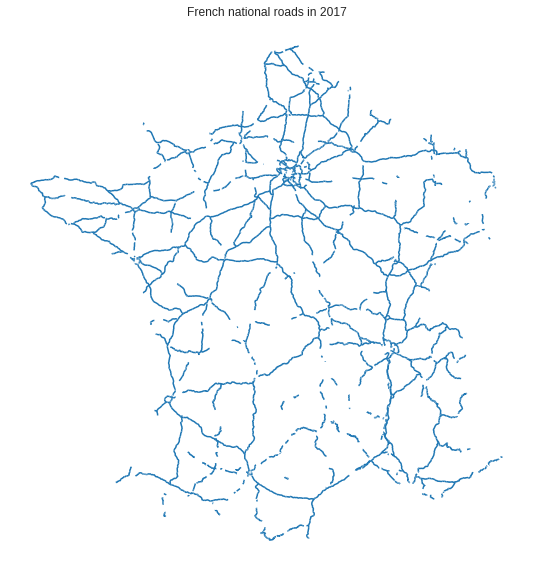

In [69]:
f, ax = plt.subplots(1, figsize=(10, 10))
ax = road_data.plot(ax=ax)
ax.set_axis_off()
ax.set_title('French national roads in 2017')
plt.show()

In [78]:
nb_roads = len(road_data['route'].unique())
print('Number of national french roads in 2017 :', nb_roads)

nb_measure_points = len(road_data['route_pr_id'].unique())
print('Number of measure points in 2017 :', nb_measure_points)

Number of national french roads in 2017 : 247
Number of measure points in 2017 : 3776


In [87]:
avg_freq_roads.iloc[0]

96056.1

## Set up graphic functions

In [100]:
def config_plot():
    plt.style.use('seaborn-whitegrid')
    plt.rcParams.update({'font.size': 13})
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    return fig, ax
    

def pie_chart(labels, values, title=None):    
    fig, ax = config_plot()
    colors = sns.color_palette("Blues", len(labels))
    ax.pie(values, labels=labels, colors=colors, shadow=True, startangle=130)
    ax.axis('equal')
    ax.legend(loc=0, frameon=True)
    if title != None:
        ax.set_title(title)
    plt.show()


def bar_plot(labels, values, title=None):
    fig, ax = config_plot()
    ax.bar(labels, values)
    if title != None:
        ax.set_title(title)
    plt.show()        

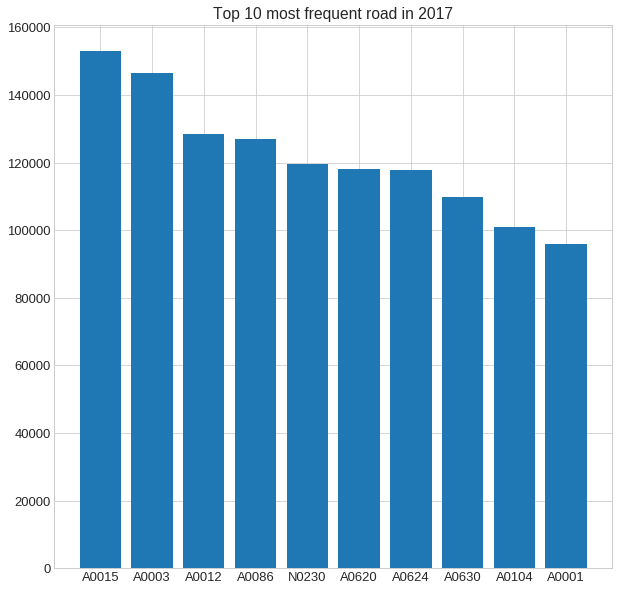

In [102]:
avg_freq_roads = road_data.groupby('route')['tmja'].mean()
avg_freq_roads_top_10 = avg_freq_roads.sort_values(ascending=False)[0:10]
bar_plot(avg_freq_roads_top_10.index, avg_freq_roads_top_10.values, title='Top 10 most frequent road in 2017')

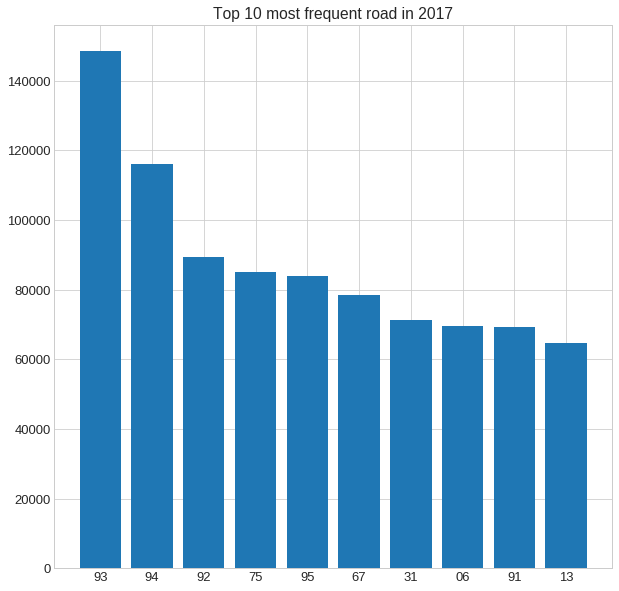

In [105]:
avg_freq_dep = road_data.groupby('depPrD')['tmja'].mean()
avg_freq_dep_top_10 = avg_freq_dep.sort_values(ascending=False)[0:10]
bar_plot(avg_freq_dep_top_10.index, avg_freq_dep_top_10.values, title='Top 10 most frequent road in 2017')

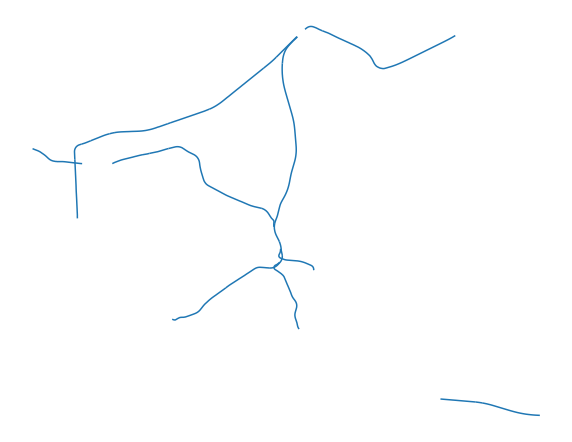

In [116]:
fig, ax = config_plot()
roads_93 = road_data[road_data['depPrD'] == '93']
roads_93.plot(ax=ax)
ax.set_axis_off()
plt.show()

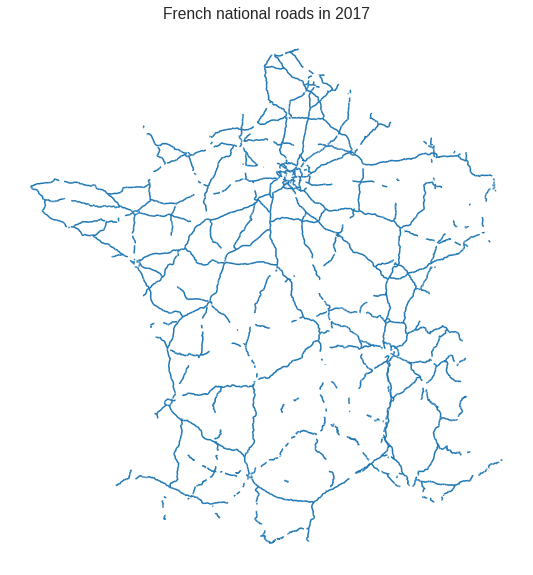

In [119]:
f, ax = plt.subplots(1, figsize=(10, 10))
ax = road_data.plot(ax=ax)
ax.set_axis_off()
ax.set_title('French national roads in 2017')

plt.savefig('french_map.png')
plt.show()